In [78]:
import numpy as np
from itertools import combinations
import math
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

N = 288
i = 10
stress = np.logspace(0.1, 2, i, endpoint=True)/100
elements = [int(s * N) for s in stress]

print(elements)

[3, 5, 9, 15, 25, 41, 66, 108, 177, 288]


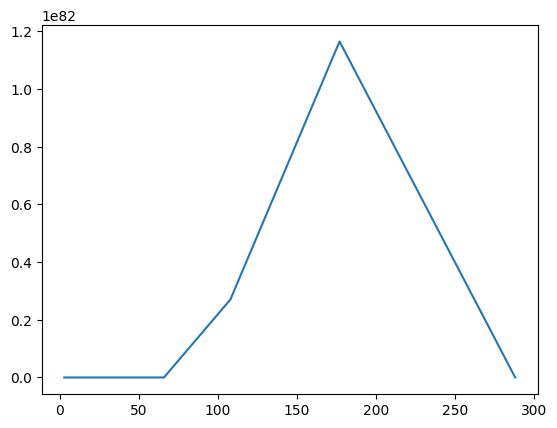

In [18]:
c = list()
for r in elements:
    c.append(math.factorial(N)/(math.factorial(r)*math.factorial(N-r)))
sns.lineplot(x=elements, y=c);

S
0.0325799095383843
Sp
0.25210317417513295
N
0.7857388316151166
Np
0.4593642611683819


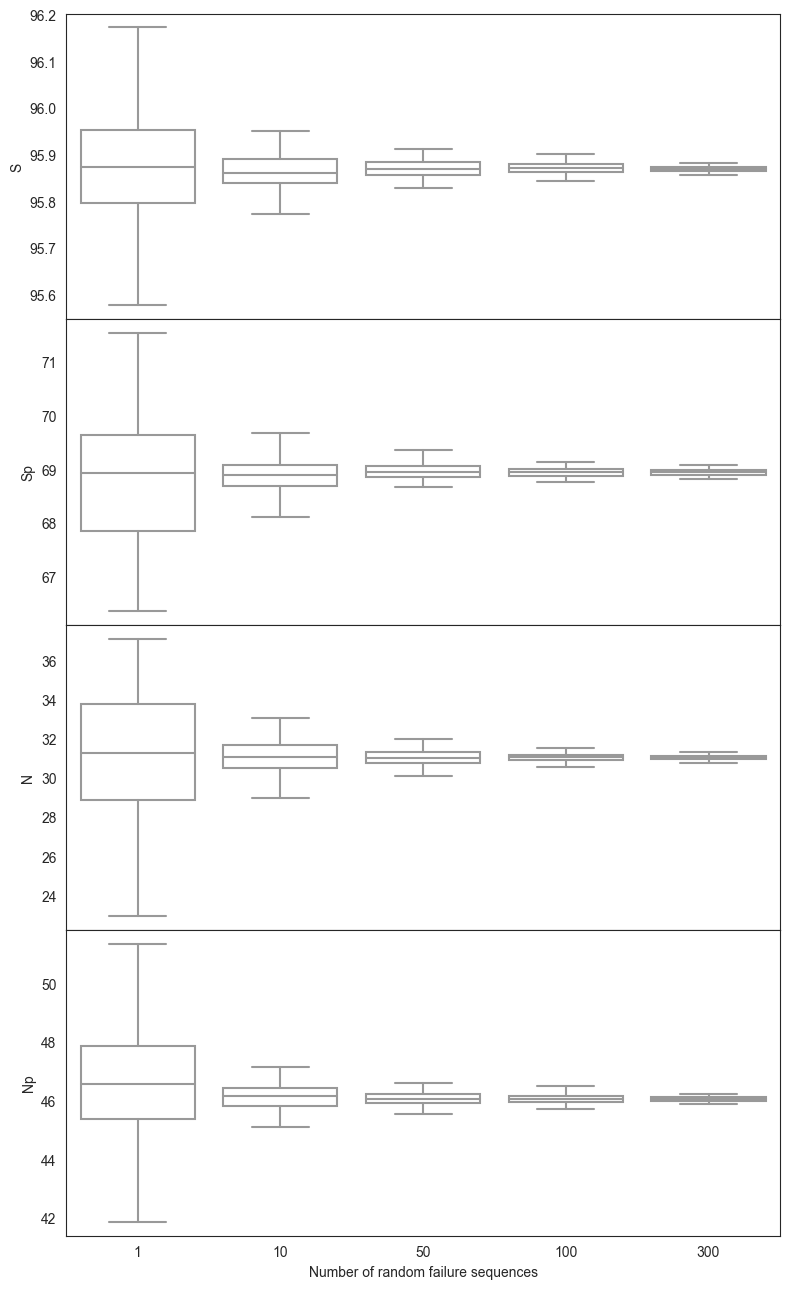

In [111]:
def get_bootstrapped_results(dim, aspect, samples, size):
    df = pd.read_csv('benchmark/Ctown_reliability.csv', index_col=0)
    df = df[(df['Threshold'] == 1) & (df['Dimension'] == dim) & (df['Aspect'] == aspect)]
    stress = list()
    for level in df['Stress'].unique():
        if level == 0:
            continue
        stress.append(df[df['Stress'] == level])

    bootstrapping = list()
    for s in samples:
        for n in range(size):
            temp = pd.DataFrame()
            for level in stress:
                temp = pd.concat([temp, level[['Stress', 'Reliability']].sample(s)])
            bootstrapping.append([s, n, temp['Reliability'].mean()])
    return pd.DataFrame(bootstrapping, columns=['Samples', 'n', 'Resilience'])


plt.rcParams['figure.figsize'] = [8, 13]
sns.set_style("white")
sns.set_palette("bright")
fig, axs = plt.subplots(4, 1)
kpi = {'S': ['Magnitude', 'Service'], 'Sp': ['Peak', 'Service'], 'N': ['Magnitude', 'Spatial'], 'Np': ['Peak', 'Spatial']}
for i, k in enumerate(kpi.keys()):
    df = get_bootstrapped_results(kpi[k][0], kpi[k][1], samples=[1, 10, 50, 100, 300], size=100)
    df = df.rename(columns={'Resilience': k, 'Samples': 'Number of random failure sequences'})
    sns.boxplot(df, x='Number of random failure sequences', y=k, color='white', showfliers = False, ax=axs[i])
    
    df = df[df['Number of random failure sequences'] == 300]
    print(k)
    print(df[k].max()-df[k].min())

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0)
plt.show()


In [110]:
samples = [0.009675, 0.063298, 0.167805, 0.093149]
df_variants = pd.read_csv('results/resilience_result.csv', index_col=0)
print(df_variants.max()-df_variants.min())

S     1.690585
Sp    4.080583
N     8.391294
Np    9.267918
dtype: float64
